<a href="https://colab.research.google.com/github/DhanushSridhar26/FER-python-code/blob/master/Facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing 
Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow import keras

**Loading Dataframe**


[Kaggle Data Set](https://www.kaggle.com/deadskull7/fer2013) Click to see



In [ ]:
df = pd.read_csv('/content/drive/My Drive/fer2013/fer2013.csv')

In [ ]:
new_df = []
new_df.append(str(df['pixels'][0]).split(" "))
new_df
df.head(20)

In [ ]:
df['Usage'].unique()

In [ ]:
new_df.append(str(df['pixels'][2]).split(" "))
len(new_df)

In [ ]:
pd.DataFrame(new_df)

In [ ]:
df['emotion'].unique()

**Pre-Processing**

In [ ]:
images_data = []
max_len = 0
for i in range(df.shape[0]):
  k=df['pixels'][i].split(" ")
  k=[int(x) for x in k]
  images_data.append(k)
  t=len(images_data[i])
  if t>max_len:
    max_len=t
print(max_len)
images_df = pd.DataFrame(images_data)

2304


In [ ]:
images_df['class'] = df['emotion']

In [ ]:
images_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303,class
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6


In [ ]:
temp = np.array(images_df.iloc[15,:2304]).reshape(48,48)

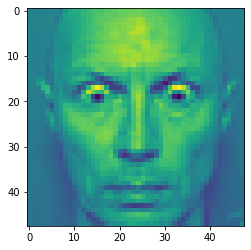

In [ ]:
plt.imshow(temp)

In [ ]:
'''for i in range(10):
  temp = np.array(images_df.iloc[i,:2304]).reshape(48,48)
  plt.imshow(temp)
  plt.show()'''

'for i in range(10):\n  temp = np.array(images_df.iloc[i,:2304]).reshape(48,48)\n  plt.imshow(temp)\n  plt.show()'

In [ ]:
from sklearn.model_selection import train_test_split


X = images_df.drop(['class'],axis=1)/255.0
y=images_df['class']
xtrval ,xts,ytrval,yts = train_test_split(X,y,test_size=0.2,random_state= 2)

In [ ]:
yts.shape

(7178,)

In [ ]:
xtr,xval,ytr,yval = train_test_split(xtrval,ytrval,test_size=0.2,random_state= 2)

**Creating Model**

In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters=32,kernel_size = (2,2),input_shape=(48,48,1)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(filters=64,kernel_size = (2,2),input_shape=(48,48,1)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(filters=128,kernel_size = (2,2),input_shape=(48,48,1)))

model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=256,kernel_size = (2,2),input_shape=(48,48,1)))

model.add(layers.MaxPool2D((2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(1000,activation='relu'))

model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))

model.add(layers.Dense(200,activation='relu'))

model.add(layers.Dense(7,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         1

In [ ]:
xtr=np.array(xtr).reshape(22967,48,48,1)
xval= np.array(xval).reshape(5742,48,48,1)
yval=np.array(yval).reshape(5742,)
ytr=np.array(ytr).reshape(22967,)

In [ ]:
print(xval.shape)
print(yval.shape)
print(xtr.shape)
print(ytr.shape)

(5742, 48, 48, 1)
(5742,)
(22967, 48, 48, 1)
(22967,)


**Compiling - Model Training**

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])

best = keras.callbacks.ModelCheckpoint('model.h5',best_model_only = True)
early_stop = keras.callbacks.EarlyStopping(patience=15,
                                                  restore_best_weights=True)

model_hist = model.fit(xtr,ytr,epochs=200,validation_data=(xval,yval),callbacks = [best,early_stop])

Epoch 1/200
718/718 [==============================] - 9s 12ms/step - loss: 1.6631 - accuracy: 0.3265 - val_loss: 1.4865 - val_accuracy: 0.4157
Epoch 2/200
718/718 [==============================] - 8s 11ms/step - loss: 1.4358 - accuracy: 0.4358 - val_loss: 1.3831 - val_accuracy: 0.4667
Epoch 3/200
718/718 [==============================] - 8s 11ms/step - loss: 1.2876 - accuracy: 0.5059 - val_loss: 1.2754 - val_accuracy: 0.5207
Epoch 4/200
718/718 [==============================] - 8s 11ms/step - loss: 1.1709 - accuracy: 0.5537 - val_loss: 1.2273 - val_accuracy: 0.5282
Epoch 5/200
718/718 [==============================] - 8s 11ms/step - loss: 1.0417 - accuracy: 0.6047 - val_loss: 1.2476 - val_accuracy: 0.5430
Epoch 6/200
718/718 [==============================] - 8s 11ms/step - loss: 0.9178 - accuracy: 0.6616 - val_loss: 1.2628 - val_accuracy: 0.5467
Epoch 7/200
718/718 [==============================] - 8s 11ms/step - loss: 0.7775 - accuracy: 0.7154 - val_loss: 1.3449 - val_accuracy:

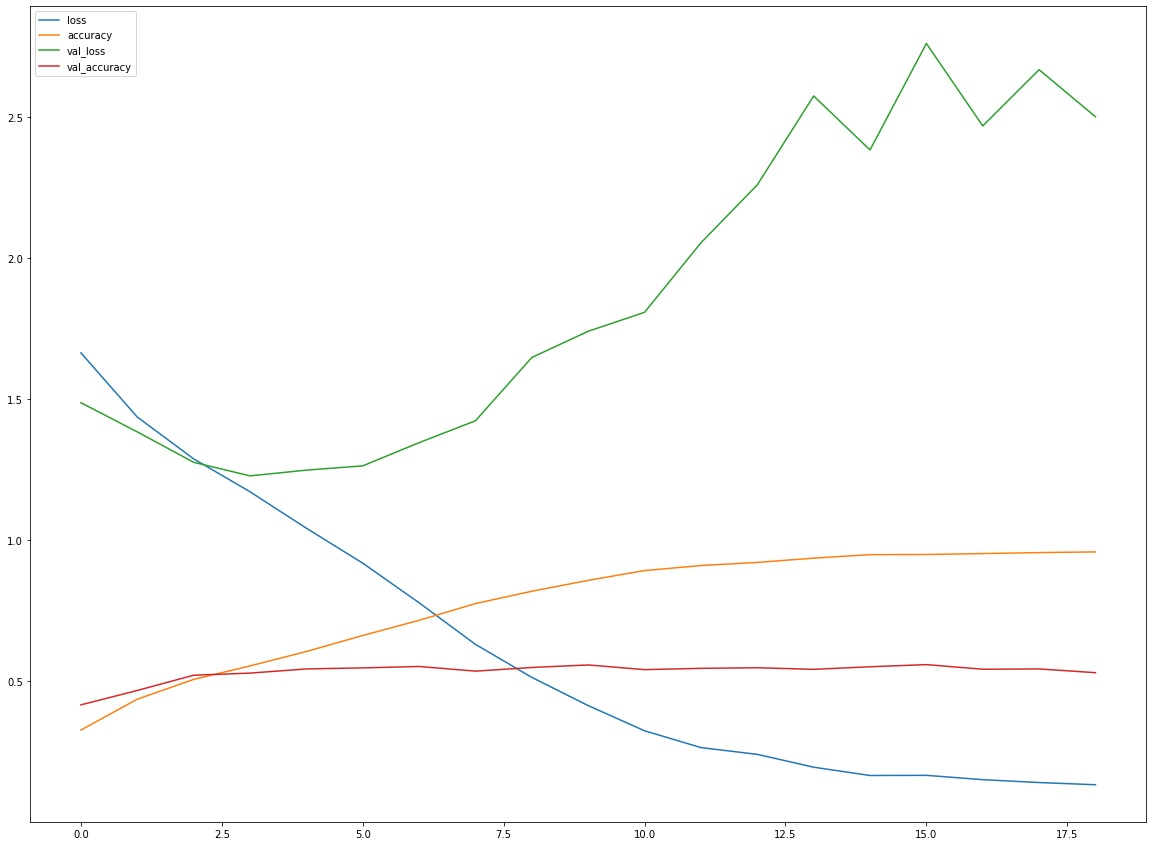

In [ ]:
pd.DataFrame(model_hist.history).plot(figsize=(20,15))

In [ ]:
#Save Model in h5 file

In [ ]:
model.save("model.h5")

In [ ]:
# Load Model from that file

In [ ]:
model = keras.models.load_model('model.h5')

In [ ]:
l = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



The original image:


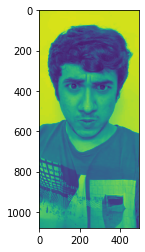

In [ ]:
img = cv2.imread('/content/WhatsApp Image 2020-08-11 at 8.24.35 PM.jpeg',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)



Image after croping face alone for ease of prediction:
2
The predicted expression is :
Fear


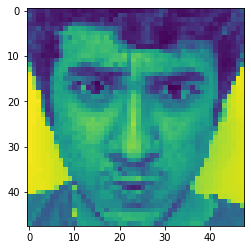

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])

The original image:


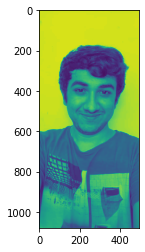

In [ ]:
img = cv2.imread('/content/WhatsApp Image 2020-08-11 at 8.24.37 PM.jpeg',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)


Image after croping face alone for ease of prediction:
3
The predicted expression is :
Happy


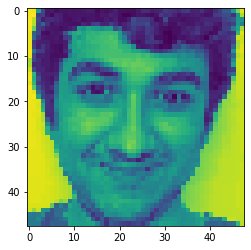

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])


The original image:


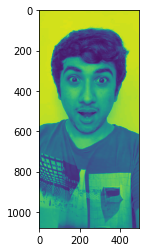

In [ ]:
img = cv2.imread('/content/WhatsApp Image 2020-08-11 at 8.24.42 PM.jpeg',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)



Image after croping face alone for ease of prediction:
5
The predicted expression is :
Surprise


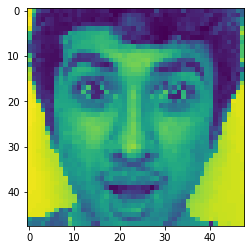

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])

The original image:


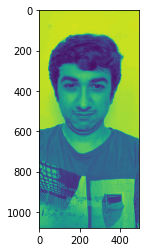

In [ ]:
img = cv2.imread('/content/WhatsApp Image 2020-08-11 at 8.24.48 PM.jpeg',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)



Image after croping face alone for ease of prediction:
4
The predicted expression is :
Sad


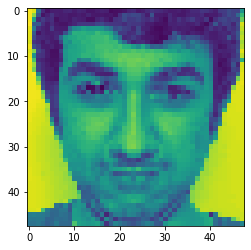

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])

The original image:


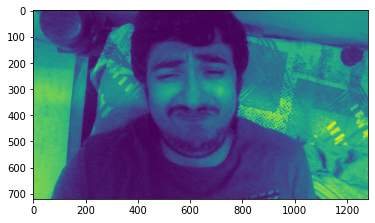

In [ ]:
img = cv2.imread('/content/sad.jpg',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)


Image after croping face alone for ease of prediction:
2
The predicted expression is :
Fear


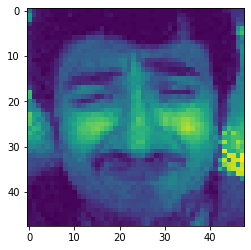

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])


The original image:


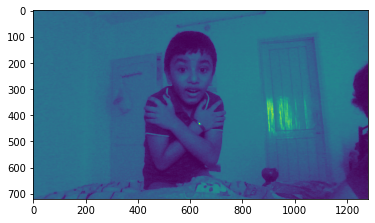

In [ ]:
img = cv2.imread('/content/WIN_20200803_15_06_54_Pro.jpg',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)


Image after croping face alone for ease of prediction:
2
The predicted expression is :
Fear


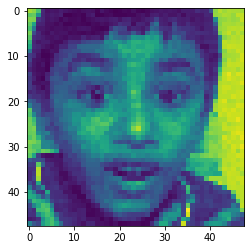

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])


The original image:


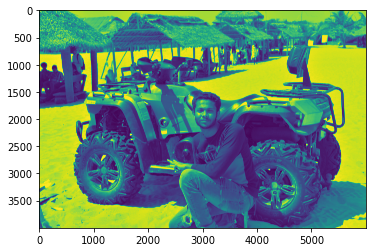

In [ ]:
img = cv2.imread('/content/drive/My Drive/ISHAQUE/DSC_0056.JPG',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)



Image after croping face alone for ease of prediction:
6
The predicted expression is :
Neutral


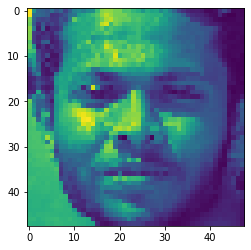

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])

The original image:


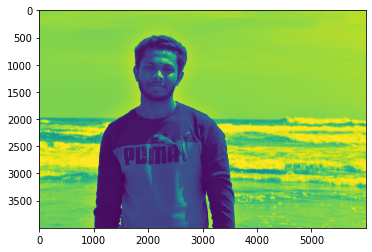

In [ ]:
img = cv2.imread('/content/drive/My Drive/ISHAQUE/DSC_0109.JPG',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]
print("The original image:")
plt.imshow(img)


Image after croping face alone for ease of prediction:
6
The predicted expression is :
Neutral


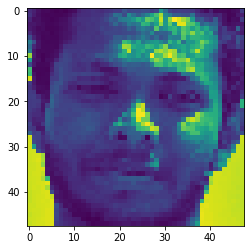

In [ ]:
print("Image after croping face alone for ease of prediction:")
y=cv2.resize(img[y1:y2,x1:x2],(48,48))
plt.imshow(y)
#y.resize(48,48)
y.shape
y=y.reshape(1,48,48,1)
k = model.predict_classes(y)
print(k[0])
print("The predicted expression is :")
print(l[k[0]])